In [1]:
import numpy as np
import re
from collections import defaultdict

corpus = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''



In [2]:
def tokenize(corpus):

    #It removes punctiuations and splitting the corpus.
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(corpus.lower())


def onehot(idx,len_vocab):
    #converting the word in one-hot encoded vectors on vocabulary size.
    word_vec = [0 for _ in range(len_vocab)]
    word_vec[idx] = 1
    return word_vec

def chain(*iterables):

    for it in iterables:
        for element in it:
            yield element

def generate_data(corpus,window=2):

    #In Skip-gram algorithm it use stochastic gradient descent. Thus,
    #this function convert the data in target_word and context word 
    #and it will be seperated for SGD.
    word_counts = defaultdict(int)
    for word in corpus:
        word_counts[word]  +=1
    word_len = len(word_counts)
    
    word_list = list(word_counts.keys())
    
    word_index = dict((word , i ) for i, word in enumerate(word_list))
    index_word = dict((i , word ) for i, word in enumerate(word_list))
    
    data = []
    for i , word in enumerate(corpus):
        w_target = onehot(word_index[corpus[i]],word_len)
        
        w_context = []
        
        iters = chain(range(max(0,i-window),i),range(i,min(len(corpus),i+window+1)))
        for j in iters:
            if i != j:
                w_context.append(onehot(word_index[corpus[j]],word_len))
        data.append([w_target,w_context])
        
    return np.array(data)


In [3]:
def initparams(vocab_size,word_embedding):
    #Initializing the layer params
    #
    params = {}
    params['w1'] = np.random.randn(vocab_size,word_embedding)*1e-2
    params['w2'] = np.random.randn(word_embedding,vocab_size)*1e-2
    return params
    

In [4]:
def forward_pass(params,x):
    #forwarding the data troughout the model.
    cache = {}
    cache['a1'] = params['w1'].T @ x
    cache['a2']= params['w2'].T @ cache['a1']
    cache['y_hat'] = softmax(cache['a2'])
    return cache

In [5]:
def softmax(x):
    #softmax activation function.
    #While we implementing multivariable classification.
    # Softmax is a best choice 
    x_norm = np.exp(x- np.max(x))
    return x_norm /x_norm.sum(axis=0)

In [6]:
def backprop(params,cache,error,X):
    #most cruicial part of the model.
    #implementing the gradient to one training input at a time.
    #finding the needed correction according the error.
    derivs = {}
    derivs['dw2'] = np.outer(cache['a1'],error)
    derivs['dw1'] = np.outer(X,np.dot(params['w2'],error.T))
    return derivs

In [16]:
def train(training_data,epoch,n_embedding,lr=0.01):
    params= initparams(len(training_data[0][0]),n_embedding)
    """I use stochastic gradient descent because if we convert the training data,
    it can be mini-batch gradiend descent"""
    losses = []
    for i in range(epoch):
        
        loss = 0
        for X, y in training_data:
            #forward pass

            cache = forward_pass(params,X)
            #calculating the error
            error= np.sum([np.subtract(cache['y_hat'], y_i) for y_i in y],axis=0)

            #backpropagation 
            derivs=  backprop(params,cache,error,X)

            #updating params
            params['w1'] -= lr*derivs['dw1']
            params['w2'] -= lr*derivs['dw2']
            #calculating the loss
            loss +=  -np.sum([cache['a2'][y_i.index(1)] for y_i in y]) + len(y) * np.log(np.sum(np.exp(cache['a2'])))
        if i %20 == 0:    
            print(f'Epoch :{i} ====> loss :{loss} \n')
        losses.append(loss)
    return losses

In [17]:
#                 
#--------------------------------------------------------------------------------------
#Testing the skip-gram algorithm. 
token =tokenize(corpus)
training_data = generate_data(token,window=2)
losses =train(training_data,2000,2)



Epoch :0 ====> loss :1351.1331729114952 

Epoch :20 ====> loss :1351.0934587527347 

Epoch :40 ====> loss :1350.8901219812008 

Epoch :60 ====> loss :1349.3408292536803 

Epoch :80 ====> loss :1336.8050054909704 

Epoch :100 ====> loss :1290.4083651693506 

Epoch :120 ====> loss :1230.6470158634775 

Epoch :140 ====> loss :1158.9626906882713 

Epoch :160 ====> loss :1113.7092565047976 

Epoch :180 ====> loss :1082.8293997669757 

Epoch :200 ====> loss :1061.3070570849281 

Epoch :220 ====> loss :1047.6161123823886 

Epoch :240 ====> loss :1038.8920096014526 

Epoch :260 ====> loss :1032.8603837297335 

Epoch :280 ====> loss :1028.3705252815791 

Epoch :300 ====> loss :1024.8292423271757 

Epoch :320 ====> loss :1021.9173389243502 

Epoch :340 ====> loss :1019.4524954190147 

Epoch :360 ====> loss :1017.323766775676 

Epoch :380 ====> loss :1015.4604972591696 

Epoch :400 ====> loss :1013.8161303697747 

Epoch :420 ====> loss :1012.3581980428363 

Epoch :440 ====> loss :1011.06163985495

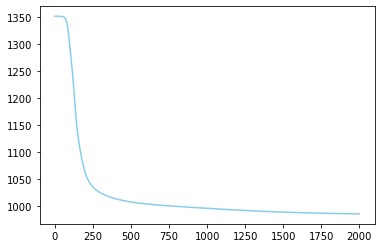

In [18]:

import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(range(2000), losses, color="skyblue")